Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Runtime$\rightarrow$Restart runtime) and then **run all cells** (in the menubar, select Runtime$\rightarrow$Run all).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and ID below:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
NAME = "Sina Dadmand"
KUID = "0078862"

---

<h2 style="text-align: center; line-height: 0px;">CHBI 422 / 522</h2>
<h3 style="text-align: center; line-height: 0px;">Spring 2022</h3>
<h3 style="text-align: center; line-height: 0px;">Homework 2</h3>
<h4 style="text-align: center; line-height: 0px;">Due date: March 23, 2022 - 23:59</h4>

<hr>

In this homework you are going to work with a pre-modified PDB file. You will be required to do calculate some angles, distances, and apply some transformations. This notebook will guide you through the steps of the homework. Check the provided test cases to make sure that you have the same requirement format.

To complete these homeworks, you will use Google Colab.If you experience any problems please get in touch with the TA: zabali16@ku.edu.tr

**Submission** <br>
After you are done and passed all the test, please submit this notebook to Blackboard. If you are not getting full points from a test, you may be failing some hidden tests. Think about the edge cases (your code might be working in general, but failing for some special cases). Please do not forget to **save** your work before you submit, and **check** whether you are in the final version.

**Importing Libraries** <br>
Please run the below cell to import the necessary libraries. Do not import any libraries other then the ones provided. If a library, or function you want to use is not included in the following cell, then you are not allowed to use it for this homework.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Part 1 - Reading a PDB File as a NumPy Array (10 points)

Run the below cell to download the PDB file for this assignment.

In [4]:
! wget -O hw2.pdb https://raw.githubusercontent.com/zeynepabali/ku_chbi522/main/hw2.pdb

--2022-03-25 17:45:53--  https://raw.githubusercontent.com/zeynepabali/ku_chbi522/main/hw2.pdb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2430 (2.4K) [text/plain]
Saving to: ‘hw2.pdb’

hw2.pdb             100%[===================>]   2.37K  --.-KB/s    in 0s      

2022-03-25 17:45:53 (24.3 MB/s) - ‘hw2.pdb’ saved [2430/2430]



A few sample lines from the downloaded file looks like below: <br>
ATOM&emsp;1&emsp;N&ensp;&emsp;THR&emsp;1&emsp;-7.712&emsp;14.556&emsp;16.794&emsp;1.00&emsp;17.45&emsp;N <br>
ATOM&emsp;2&emsp;CA&emsp;THR&emsp;1&emsp;-7.046&emsp;15.510&emsp;17.660&emsp;1.00&emsp;16.13&emsp;C <br>
ATOM&emsp;3&emsp;C&ensp;&emsp;THR&emsp;1&emsp;-6.849&emsp;14.891&emsp;19.045&emsp;1.00&emsp;14.58&emsp;C <br>
ATOM&emsp;8&emsp;N&ensp;&emsp;VAL&emsp;2&emsp;-5.693&emsp;15.098&emsp;19.646&emsp;1.00&emsp;12.07&emsp;N <br>
ATOM&emsp;9&emsp;CA&emsp;VAL&emsp;2&emsp;-5.490&emsp;14.585&emsp;21.007&emsp;1.00&emsp;10.98&emsp;C

This file is already cleaned for you. It only contains the backbone atoms (N, CA, C), and no side chain atoms for your convenience.

Each column in this file has a meaning. Normally, PDB files include much more information than the atom position of a molecules atoms. You can check one if you wish to here: https://files.rcsb.org/view/1A09.pdb Let us go over what each column in this file tells us:

**Column 1:** "ATOM" identifier specifies that this line gives information about an atom in the strucure. <br>
**Column 2:** Atom number - They are not continues in our case, since we removed the side chain atoms. <br>
**Column 3:** Atom type <br>
**Column 4:** Residue type <br>
**Column 5:** Residue number <br>
**Column 6:** X coordinate <br>
**Column 7:** Y coordinate <br>
**Column 8:** Z coordinate <br>
**Column 9:** Occupancy <br>
**Column 10:** B factor <br>
**Column 11:** Atom type

Since we are interested in the coordinates of the atoms in this homework, we are going to use columns 3,5-8. Though, remember when you are coding that Python is zero-indexed.

In [5]:
def read_pdb_file(file_path):
    """ Read the coordinates of atoms from a PDB file and return a dictionary of coordinate lists 
        You may want to check np.genfromtxt() and its additional parameters, or you can use any 
        file reading method you feel comfortable
        You will need "Atom type", "Residue Number", "X-Y-Z" coordinates 
        Your final output should look like:
        {"Residue number": {"Atom type": [x-y-z coordinates]}}"""
    
    # YOUR CODE HERE
    pdb_dict = {}
    inner_dict = {}
    with open('hw2.pdb') as pdbfile:
      for line in pdbfile:
        splitted_line = line.split()
        inner_dict[splitted_line[2]] = [float(splitted_line[5]), float(splitted_line[6]), float(splitted_line[7])]
        pdb_dict[int(splitted_line[4])] = inner_dict.copy()

    return pdb_dict

In [6]:
assert len(read_pdb_file('hw2.pdb')) == 10
assert read_pdb_file('hw2.pdb')[4] == {'N': [-6.222, 16.563, 26.096], 'CA': [-5.723, 16.132, 27.38], 'C': [-6.713, 16.614, 28.449]}
assert read_pdb_file('hw2.pdb')[2]['N'] == [-5.693, 15.098, 19.646]
assert read_pdb_file('hw2.pdb')[10]['CA'] == [-11.739, 13.008, 46.64]

### Part 2 - Calculating the angles and transformation matrices by hand (25 Points)

You can either type your solution using $\LaTeX$ in the next cell, or you can upload a scanned copy of your hand-written solution to Blackboard (Please make sure that your hand-written solution is readable). You will get the full point for a correct solution in either case!

Using $\LaTeX$ may appear a bit complicated at first. But, we would suggest giving it a *few* chances. Here are some resources to help you with getting started:
https://jupyterbook.org/content/math.html <br>
https://www.overleaf.com/learn/latex/Mathematical_expressions

Try to copy-paste a few equations from the first link to see how it works. Then you can work your way towards your own solution by changing bits and pieces.

Calculate the bond vectors, phi (𝜙), psi (𝜓), omega (𝜔), theta (𝜃) angles for **residue number 4 (TYR)**.

YOUR ANSWER HERE

Use transformation matrices to go back to rectilinear coordinate system.

YOUR ANSWER HERE

### Part 3 - Calculating the dihedral angles with Python (25 Points)

In this part, you are going to use Python to repeat Part 2 for all residues in the file. You will start by creating the necessary functions, and then use those functions to calculate the dihedral angles for each residue.

In [7]:
def calculate_phi(aa1, aa2):
    """ Given two consecutive amino acids, calculate the phi angle for the second one
        Return the angle in degrees """
    # YOUR CODE HERE

    c_1 = np.array(aa1['C'])
    n_2 = np.array(aa2['N'])
    ca_2 = np.array(aa2['CA'])
    c_2 = np.array(aa2['C'])
    
    l_1 = n_2-c_1
    l_2 = ca_2 - n_2
    l_3 = c_2 - ca_2
    
    n_1 = np.cross(l_1, l_2)
    n_2 = np.cross(l_2, l_3)
    
    u = n_1 / np.linalg.norm(n_1)
    v = n_2 / np.linalg.norm(n_2)
    
    u_dot_v = np.dot(u,v)
    radians = np.arccos(u_dot_v)
    
    sign = np.sign(np.dot(l_3, n_1))
    phi = np.degrees(radians)
    
    if sign != np.sign(phi):
        phi = -1 * phi

    return phi

In [8]:
test_protein = read_pdb_file('hw2.pdb')
assert np.isclose(calculate_phi(test_protein[1], test_protein[2]), -92.9674)

In [9]:
def calculate_psi(aa1, aa2):
    """ Given two consecutive amino acids, calculate the psi angle for the first one 
        Return the angle in degrees """
    # YOUR CODE HERE
    n_1 = np.array(aa1['N'])
    ca_1 = np.array(aa1['CA'])
    c_1 = np.array(aa1['C'])
    n_2 = np.array(aa2['N'])
    
    l_1 = ca_1 - n_1
    l_2 = c_1 - ca_1
    l_3 = n_2 - c_1
    
    n_1 = np.cross(l_1, l_2)
    n_2 = np.cross(l_2, l_3)
    
    u = n_1 / np.linalg.norm(n_1)
    v = n_2 / np.linalg.norm(n_2)
    
    u_dot_v = np.dot(u,v)
    radians = np.arccos(u_dot_v)
    
    sign = np.sign(np.dot(l_3, n_1))
    psi = np.degrees(radians)
    
    if sign != np.sign(psi):
        psi = -1 * psi
    return psi


In [10]:
test_protein = read_pdb_file('hw2.pdb')
assert np.isclose(calculate_psi(test_protein[1], test_protein[2]), 138.2198)

In [11]:
def calculate_omega(aa1, aa2):
    """ Given two consecutive amino acids, calculate the omega angle between them 
        Return the angle in degrees """
    # YOUR CODE HERE
    ca_1 = np.array(aa1['CA'])
    c_1 = np.array(aa1['C'])
    n_2 = np.array(aa2['N'])
    ca_2 = np.array(aa2['CA'])
    
    l_1 = c_1 - ca_1 
    l_2 = n_2 - c_1
    l_3 = ca_2 - n_2
    
    n_1 = np.cross(l_1, l_2)
    n_2 = np.cross(l_2, l_3)
    
    u = n_1 / np.linalg.norm(n_1)
    v = n_2 / np.linalg.norm(n_2)
    
    u_dot_v = np.dot(u,v)
    radians = np.arccos(u_dot_v)
    
    sign = np.sign(np.dot(l_3, n_1))
    omega = np.degrees(radians)
    
    if sign != np.sign(omega):
        omega = -1 * omega

    return omega

In [12]:
test_protein = read_pdb_file('hw2.pdb')
assert np.isclose(calculate_omega(test_protein[1], test_protein[2]), 176.6244)

In [13]:
def calculate_all(protein_dict):
    """ For a given amino acid sequence, calculate all possible phi, psi, omega, theta angles and bond distances,
        vectors, using the functions defined before """
    # YOUR CODE HERE
    phi_list = [None] + [calculate_phi(test_protein[i], test_protein[i+1]) for i in range(1,10)]   # we start calculating from 2nd residue since first is not doable (None value added)
    psi_list = [calculate_psi(test_protein[i], test_protein[i+1]) for i in range(1,10)] # we finish calculating in the residue one before last since it is not doable (None value added below)
    psi_list.append(None)
    omega_list = [calculate_omega(test_protein[i], test_protein[i+1]) for i in range(1,10)]

    return phi_list, psi_list, omega_list

In [14]:
test_protein = read_pdb_file('hw2.pdb')
assert np.isclose(calculate_all(test_protein)[0][5], -91.1347)
assert calculate_all(test_protein)[1][-1] == None
assert (np.isclose(calculate_all(test_protein)[2][3], -177.8886)) or (np.isclose(calculate_all(test_protein)[2][3], 2.1114))

### Part 4 - Transformation Matrix (25 Points)

In [15]:
def tranformation_matrix(phi, theta):
    pi = np.degrees(np.pi)
    t = np.array([[np.cos(theta), np.sin(theta), 0],
                  [-np.sin(theta) * np.cos(phi), np.cos(theta) * np.cos(phi), -np.sin(phi)],
                  [-np.sin(theta) * np.sin(phi), np.cos(theta) * np.sin(phi), np.cos(phi)]])

    return t

In [16]:
def calculate_bond(aa1, aa2, l1, l2, l3, n):
    """ Given two consecutive amino acids, calculate the bond length between their CA atoms """
    # YOUR CODE HERE
    bond_dist = l1 + np.dot(tranformation_matrix(phi_list[n], 63.9), l2) + np.dot(tranformation_matrix(phi_list[n], 63.9), tranformation_matrix(phi_list[n+1], 59.3), l3)
    bond_vector = np.linalg.norm(bond_dist)
    return bond_dist, bond_vector

Apply back transformation for all possible atoms in the given pdb file, using the functions you defined previously (transformation_matrix, calculate_phi, etc.)

In [17]:
def all_back_transformed():
  # YOUR CODE HERE
  transformed_list = [calculate_bond(test_protein[i]['CA'], test_protein[i+1]['CA'], test_protein[i]['CA'] - test_protein[i-1]['CA'],
                                   test_protein[i+1]['CA'] - test_protein[i]['CA'],
                                   test_protein[i+2]['CA'] - test_protein[i+1]['CA'], i) for i in range(1,10)]
  return transformed_list



### Part 5 - Ramachandran Map (15 Points)

Draw the ramachandran map for the peptide. You should use matplotlib for this part. An introductory tutorial exists here: https://matplotlib.org/stable/tutorials/introductory/pyplot.html. For the most basic case, you may want to check plt.scatter() and plt.xlabel(), plt.ylabel().

Even this short tutorial is too detailed for our purposes here, first three cells in this documentation should be enough for this task. But, of course you can improve your plot with additional properties (coloring, size, gridlines, etc.) if you wish to. 

Do not forget to put axis labels on your plot!

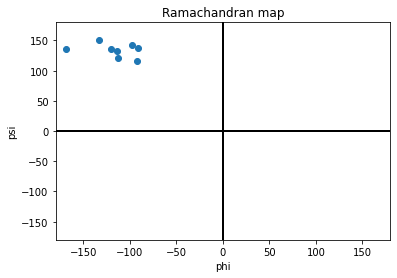

In [18]:

# YOUR CODE HERE

protein_structure = read_pdb_file('hw2.pdb')
phi_list, psi_list, _ = calculate_all(protein_structure)
plt.scatter(phi_list[:],psi_list[:])  #we draw a scatter plot
plt.ylim(-180,180)  #the limits of the x and y axes will be -180 and 180, it could -360 and 360 as well
plt.xlim(-180,180)
plt.plot([0, 0], [-180, 180], 'k-', lw=2)  #here we put the lines in the middle of the graph and select the color and the line width of these lines
plt.plot([-180, 180], [0, 0], 'k-', lw=2)
plt.xlabel('phi') #we label the axes as Phi and Psi
plt.ylabel('psi')
plt.title('Ramachandran map') #we put the title as Ramachandran map
plt.show()

Question: According to you Ramachandran map, is the peptide you are given an alpha-helix, beta-sheet, or loop region? Write your answer in the cell below.

* Since all phi and psi values are located in the B-Sheet zone (upper left here) this polypeptide has a secondary structure of B-Sheet.